In [1]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#import argparse
#import sys

In [2]:
torch.__version__

'2.1.2'

In [3]:
weight = 0.7
bias = 0.3

X = torch.arange(0.,1.,0.02).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:3] , y[:3]

(tensor([[0.0000],
         [0.0200],
         [0.0400]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280]]))

In [5]:
len(X), len(y)

(50, 50)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [7]:
len(x_train), len(x_test)

(40, 10)

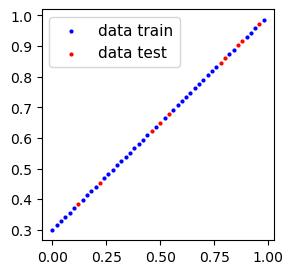

In [8]:
def plot_data(x1_data=None, x2_data=None, y1_data=None, y2_data=None, label_1=None, label_2=None,x3_data=None,y3_data=None, label_3=None):

    plt.figure(figsize=(3, 3))
    plt.scatter(x1_data, y1_data, c="b" ,s=4, label=label_1)
    plt.scatter(x2_data, y2_data, c="r", s=4, label=label_2)
    plt.scatter(x3_data, y3_data, c="g", s=4, label=label_3)
    plt.legend(prop={"size":11})

plot_data(x1_data=x_train, x2_data=x_test, y1_data=y_train, y2_data=y_test, label_1="data train", label_2="data test")

In [9]:
# Regression
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias   = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [10]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# Parameters Formato Dic
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
# predic model
with torch.inference_mode():
    y_pred = model_0(x_test)

y_pred

tensor([[0.4251],
        [0.1692],
        [0.3982],
        [0.4184],
        [0.4520],
        [0.2972],
        [0.3914],
        [0.2029],
        [0.2837],
        [0.3106]])

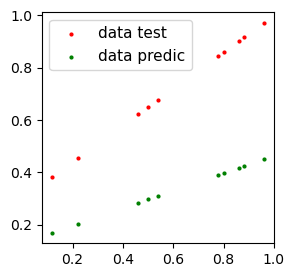

In [13]:
plot_data(x2_data=x_test, y2_data= y_test, x3_data=x_test, y3_data=y_pred, label_2="data test", label_3="data predic")

In [14]:
# Loss function L1
loss_L1 = nn.L1Loss()

# optimizador
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # lr =learn rate

loss_L1, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [15]:
torch.manual_seed(42)

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

epochs = 200                        # loop with epoch

for epoch in range(epochs):
    
    model_0.train()                 # set the model
    y_pred = model_0(x_train)       # 1. forward  pass = forward propagation
    loss = loss_L1(y_pred, y_train) # 2. cal loss
    
    optimizer.zero_grad()           # 3. optimizer zero grad
    loss.backward()                 # 4. perform backward = backpropagation
    optimizer.step()                # 5. step the optimizer

    model_0.eval()                  # turns off setting model
    with torch.inference_mode():    # turns off gradiend tracking
        test_pred = model_0(x_test) # do the fordward pass
        test_loss= loss_L1(test_pred, y_test.type(torch.float)) # calculate the los

    if epoch % 50 == 0:         # print out what's happenin
        epoch_count.append(epoch)
        loss_values.append(loss.detach().numpy())               # convert to numpy for plot
        test_loss_values.append(test_loss.detach().numpy())     # convert to numpy for plot

        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")    # print out model

Epoch: 0 | MAE Train Loss: 0.3381313681602478 | MAE Test Loss: 0.3807239234447479 
Epoch: 50 | MAE Train Loss: 0.04424785077571869 | MAE Test Loss: 0.04692744091153145 
Epoch: 100 | MAE Train Loss: 0.019225845113396645 | MAE Test Loss: 0.019680339843034744 
Epoch: 150 | MAE Train Loss: 0.006917061749845743 | MAE Test Loss: 0.00515579292550683 


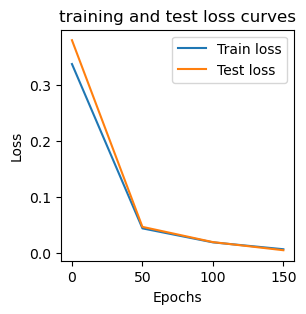

In [16]:
# Plot the loss curves
plt.figure(figsize=(3,3))
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [17]:
loss_values

[array(0.33813137, dtype=float32),
 array(0.04424785, dtype=float32),
 array(0.01922585, dtype=float32),
 array(0.00691706, dtype=float32)]

In [18]:
with torch.inference_mode():
    y_pred_new = model_0(x_test)

In [19]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6952])), ('bias', tensor([0.2953]))])

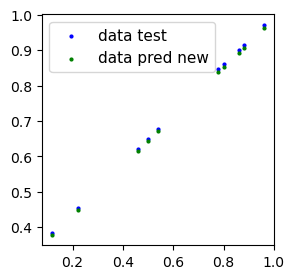

In [20]:
plot_data(x1_data=x_test, y1_data=y_test, x3_data= x_test, y3_data=y_pred_new, label_1="data test", label_3="data pred new")

In [21]:
torch.save(obj=model_0.state_dict(), f="model_0.pt")    # save model

In [22]:
# load model and with state_dict
#load_model = LinearRegressionModel()
#load_model.load_state_dict(torch.load(f="model_0.pt"))
load_model = torch.load(f="model_0.pt") 

load_model

OrderedDict([('weight', tensor([0.6952])), ('bias', tensor([0.2953]))])

# Recrear LinearRegression 

In [23]:
weight = 0.7
bias = 0.3
x = torch.arange(0.0, 1.0, 0.02).unsqueeze(dim=1)
y = weight * x + bias
x[:3],y[:3]

(tensor([[0.0000],
         [0.0200],
         [0.0400]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280]]))

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)
len(x_train), len(x_test)

(40, 10)

In [25]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.lineal_model = nn.Linear( in_features=1 , out_features=1) # in_features = una x, out_features = una y
    
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.lineal_model(x)
    
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('lineal_model.weight', tensor([[0.7645]])),
             ('lineal_model.bias', tensor([0.8300]))])

In [26]:
loss_2 = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [27]:
epochs = 200

for epoch in range(epochs):
    
    model_1.train()
    y_pred = model_1(x_train)
    loss = loss_2(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(x_test)
        test_loss = loss_2(test_pred, y_test)
    
    if epoch % 40 == 0:
        print(f"epoch:{epoch} | train loss: {loss} | test loss: {test_loss}")

epoch:0 | train loss: 0.5600506067276001 | test loss: 0.5552194714546204
epoch:40 | train loss: 0.07337480783462524 | test loss: 0.04598527029156685
epoch:80 | train loss: 0.018832748755812645 | test loss: 0.012815380468964577
epoch:120 | train loss: 0.010759826749563217 | test loss: 0.0016480416525155306
epoch:160 | train loss: 0.010759826749563217 | test loss: 0.0016480416525155306


In [28]:
model_1.state_dict()

OrderedDict([('lineal_model.weight', tensor([[0.7027]])),
             ('lineal_model.bias', tensor([0.3095]))])

In [29]:
model_1.eval()

with torch.inference_mode():
    y_pred_new = model_1(x_test)
y_pred_new[:3]

tensor([[0.4922],
        [0.8576],
        [0.7311]])

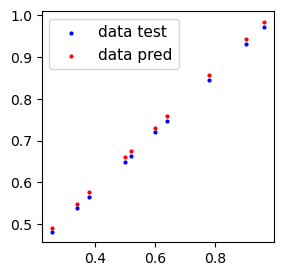

In [30]:
plot_data(x1_data=x_test, y1_data=y_test,x2_data=x_test, y2_data=y_pred_new, label_1="data test", label_2="data pred" )

In [31]:
torch.save(obj=model_1.state_dict(), f="model_1.pt") # only saving the state_dict() only saves the models learned parameters

In [32]:
load_model_1 = LinearRegressionModelV2()
load_model_1.load_state_dict(torch.load("model_1.pt"))

print(f"Loaded model:\n{load_model_1}")
print(f"Model on device:\n{next(load_model_1.parameters())}")

Loaded model:
LinearRegressionModelV2(
  (lineal_model): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
Parameter containing:
tensor([[0.7027]], requires_grad=True)


In [33]:
load_model_1.eval()
with torch.inference_mode():
    load_model_1_preds = load_model_1(x_test)
y_pred_new[:3] == load_model_1_preds[:3]

tensor([[True],
        [True],
        [True]])